In [1]:
import numpy as np
# import pyfits
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from PolarSi import PolarFITS

In [13]:
#import plank files
plank_I_fits = fits.open('FITS_files/stokes/Stokes_I_mod.fits')[0]
plank_Q_fits = fits.open('FITS_files/stokes/Stokes_Q_mod.fits')[0]
plank_U_fits = fits.open('FITS_files/stokes/Stokes_U_mod.fits')[0]

#Get the header values
Plank_RA_delt = plank_I_fits.header['CDELT1']
Plank_DEC_delt = plank_I_fits.header['CDELT2']
Plank_RA_ref = int(plank_I_fits.header['CRPIX1'])
Plank_DEC_ref = int(plank_I_fits.header['CRPIX2'])
Plank_RA_ref_value = plank_I_fits.header['CRVAL1']
Plank_DEC_ref_value = plank_I_fits.header['CRVAL2']
Plank_RA_axis_len = plank_I_fits.header['NAXIS1']
Plank_DEC_axis_len = plank_I_fits.header['NAXIS2']

#Generate the plank RA DEC mesh
Plank_RA_axis = np.arange(0,Plank_RA_axis_len,1)
Plank_DEC_axis = np.arange(0,Plank_DEC_axis_len,1)
Plank_RA_axis = Plank_RA_ref_value - Plank_RA_delt*(Plank_RA_ref - Plank_RA_axis)
Plank_DEC_axis = Plank_DEC_ref_value - Plank_DEC_delt*(Plank_DEC_axis - Plank_DEC_ref)

#making a meshgrid from the arrays
Plank_DEC_grid,Plank_RA_grid = np.meshgrid(Plank_DEC_axis,Plank_RA_axis , sparse=False, indexing='ij')

Plank_DEC_grid = Plank_DEC_grid
Plank_RA_grid = Plank_RA_grid
#Take the data files from plank fits file
plank_I_data = plank_I_fits.data
plank_Q_data = plank_Q_fits.data
plank_U_data = plank_U_fits.data


# #calculating polarization and polarization angle
plank_polarization = np.sqrt(plank_Q_data*plank_Q_data + plank_U_data*plank_U_data)/plank_I_data
ratio = plank_U_data/plank_Q_data
plank_theta_mod = (180/np.pi)*0.5*np.arctan(plank_U_data/plank_Q_data) + 90 + 63

print('plank file')
print('bottom left corner',np.amax(Plank_RA_grid),np.amin(Plank_DEC_grid))
print('top right corner',np.amin(Plank_RA_grid),np.amax(Plank_DEC_grid))


plank file
bottom left corner 274.7015924055442 -17.98024047811011
top right corner 274.6944037223554 -17.97305179492156


In [10]:
FITs_file = 'FITS_files/Halp_rsubt_L328_323_331.fits'
data  = PolarFITS(FITs_file)
# data.print_info()
data.generate_RA_DEC_mesh()
print('optical file')
print('bottom left corner',np.amax(data.RA_grid),np.amin(data.DEC_grid))
print('top right corner',np.amin(data.RA_grid),np.amax(data.DEC_grid))


fits file
bottom left corner 274.4131759592302 -18.45936668420353
top right corner 273.66390737416975 -17.70985553801647


fits file
bottom left corner 274.4131759592302 -18.45936668420353
top right corner 273.66390737416975 -17.70985553801647


In [4]:
Polarization_data = pd.read_csv(polarization_file,delimiter=',')


Polarization_data = Polarization_data[Polarization_data['ra']<np.amax(data.RA_grid)]
Polarization_data = Polarization_data[Polarization_data['ra']>np.amin(data.RA_grid)]
Polarization_data = Polarization_data[Polarization_data['dec']>np.amin(data.DEC_grid)]
Polarization_data = Polarization_data[Polarization_data['dec']<np.amax(data.DEC_grid)]
print(Polarization_data.head)

RA_array = np.array(Polarization_data['ra'])
DEC_array = np.array(Polarization_data['dec'])

print('Polarization')
print('bottom left corner',np.amax(RA_array),np.amin(DEC_array))
print('top right corner',np.amin(RA_array),np.amax(DEC_array))










 

<bound method NDFrame.head of        Unnamed: 0          ra        dec         P         PA
24624      198727  274.412627 -18.454793  0.022103  44.093945
24625      198728  274.406117 -18.454793  0.013832 -40.161310
24626      198729  274.399608 -18.454793  0.013293  39.861977
24627      198730  274.393098 -18.454793  0.013293  39.861977
24628      198731  274.386589 -18.454793  0.018493 -24.261250
...           ...         ...        ...       ...        ...
64585      354562  273.690072 -17.712710  0.003713  10.205969
64586      354563  273.683562 -17.712710  0.003731  31.836636
64587      354564  273.677053 -17.712710  0.003731  31.836636
64588      354565  273.670543 -17.712710  0.002966  20.581260
64589      354566  273.664034 -17.712710  0.002966  20.581260

[13340 rows x 5 columns]>
Polarization
bottom left corner 274.4126265637696 -18.454792997720467
top right corner 273.66403391792977 -17.712709853173813


(9, 5)
RA delt 0.00018638522016090064
DEC delt 0.0001864455587536895
0.022102823
0.013832353
0.01329309
0.022102823
0.013832353
0.013832353
0.024696747
0.013832353
0.013832353


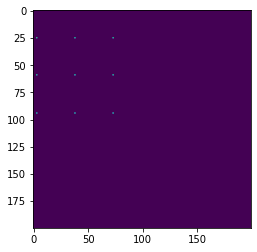

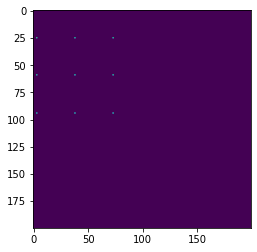

In [101]:
Polarization_map = np.ones_like(data.DEC_grid)
Polarization_angle_map = np.ones_like(data.DEC_grid)

RA_grid = data.RA_grid[0:200,0:200]
DEC_grid = data.DEC_grid[0:200,0:200]

# print(RA_grid)
# print(DEC_grid)



Polarization_data = Polarization_data[Polarization_data['ra']<np.amax(RA_grid)]
Polarization_data = Polarization_data[Polarization_data['ra']>np.amin(RA_grid )]
Polarization_data = Polarization_data[Polarization_data['dec']>np.amin(DEC_grid)]
Polarization_data = Polarization_data[Polarization_data['dec']<np.amax(DEC_grid)]
print(Polarization_data.shape)

def polarization_mapping(polarization_array,RA_grid,DEC_grid):

    RA_delt = abs(RA_grid[0,1] -RA_grid[0,0])
    DEC_delt = abs(DEC_grid[2,0]-DEC_grid[1,0])
    print('RA delt',RA_delt)
    print('DEC delt',DEC_delt)
    def Search_data(polarization_array,RA,DEC):
        polarization_array = polarization_array[abs(polarization_array['ra'] - RA) < RA_delt/2]
        polarization_array = polarization_array[abs(polarization_array['dec'] - DEC)< DEC_delt/2]
        if polarization_array.shape[0] != 0:
            a  = np.array(polarization_array['P'])
            print(a[0])
            # return polarization_array['P'][0]
            return 1
        else:
            return 0
    Polarization_map = np.zeros_like(DEC_grid)
    for i in range(DEC_grid.shape[0]):
        for j in range(DEC_grid.shape[1]):
            Polarization_map[i,j] = Search_data(polarization_array,RA_grid[i,j],DEC_grid[i,j])
    return Polarization_map
            

a = polarization_mapping(Polarization_data,RA_grid,DEC_grid)
plt.imshow(a)
plt.show(0)
